In [1]:
%matplotlib inline

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import mcaa
import competitionRunner

In [3]:
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
# Load mat data and setup constants
var = scipy.io.loadmat('randomData.mat')
y = var['y']
X = var['X']
M = int(var['M'])
N = int(var['N'])
M_test = int(var['M_test'])
X_test = var['X_test']

In [5]:
# Constants
T_FACTOR = 100000
MEASURE_STEP = int(T_FACTOR * N / 1000) + 1

# SCHEDULES
SCHEDULES = [None] * 4
ITERATION_COUNT = T_FACTOR * N

#Linear
OFFSET = 0.2
SLOPE = 1.0
SCHEDULES = [mcaa.continuousLinearSchedule(ITERATION_COUNT, OFFSET, SLOPE) for i in range(4)]

"""
#Constant
BETA = 0.6
SCHEDULES = [mcaa.constantSchedule(BETA) for i in range(4)]
"""

'\n#Constant\nBETA = 0.6\nSCHEDULES = [mcaa.constantSchedule(BETA) for i in range(4)]\n'

In [6]:
# Run
import time
start = time.time()
allEMeasures, allWeights = competitionRunner.competitionRunner(X, y, SCHEDULES, M, N, T_FACTOR, MEASURE_STEP)
end = time.time()
print(end - start)

7.387667417526245


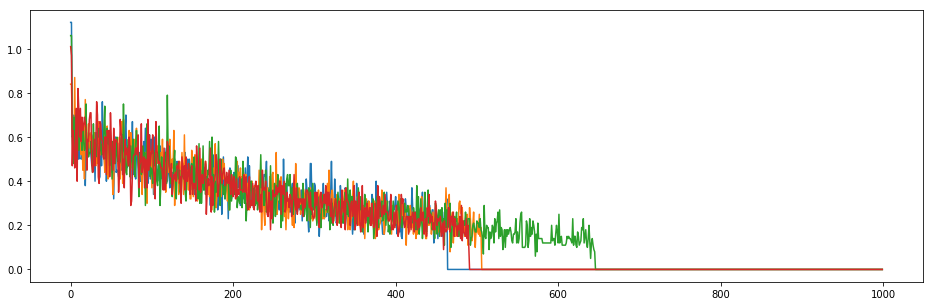

In [7]:
# Plot
plt.plot(allEMeasures)
plt.show()

In [8]:
# Get best E and its weights
index = np.argmin(allEMeasures[-1, :])
E = allEMeasures[-1, index]
w = np.reshape(allWeights[index], (N, 1))
ytest = np.reshape(mcaa.buildClasses(w, X_test), (M_test, 1))

In [9]:
# Confirm 
myY = np.reshape(mcaa.buildClasses(w, X), (M, 1))
print("You have " + str(100 * sum((myY == y).flatten().tolist()) / M) + "% correctness.")

You have 100.0% correctness.


In [10]:
# Save mat data
saveDict = {}
saveDict['w'] = w
saveDict['E'] = E
saveDict['ytest'] = ytest

scipy.io.savemat('answer_MALA.mat', saveDict)